# Tugas Kecil 1: Eksplorasi scikit-learn untuk Clustering pada Jupyter Notebook

Oleh: 13515107 - Roland Hartanto

## 1. Load Package Python

In [27]:
# Untuk analisis dan mengolah data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Untuk pembelajaran
from sklearn import metrics
from sklearn.externals import joblib
from sklearn import datasets, linear_model, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.bang import bang

from mst_clustering import MSTClustering

import joblib
import dill

## 2. Pembacaan Dataset Training

In [2]:
# load iris dataset
iris_dataset = datasets.load_iris()
print(iris_dataset)
# load tenis dataset
tenis_dataset = pd.read_csv("tennis.csv")
tenis_dataset

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## 3. Clustering
### 3.1 Clustering Dataset Iris

#### 3.1.1 K-Means

In [3]:
def plotClusteringResult(clustering_result, with_centroid):
    plt.scatter(x[clustering_result == 0, 0], x[clustering_result == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
    plt.scatter(x[clustering_result == 1, 0], x[clustering_result == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
    plt.scatter(x[clustering_result == 2, 0], x[clustering_result == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

    if (with_centroid):
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
    
    plt.legend()
    plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


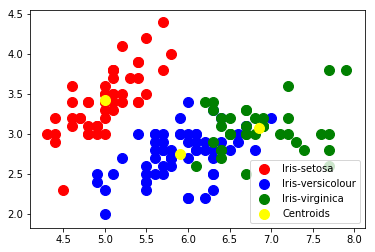

In [4]:
# K-Means
x = iris_dataset['data']
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clustering_result = kmeans.fit_predict(x)
print(clustering_result)


#Plotting the centroids of the clusters
plotClusteringResult(clustering_result, 1)

#### 3.1.2 Agglomerative Clustering

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


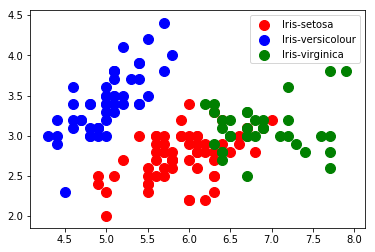

In [5]:
agglomerative = AgglomerativeClustering(n_clusters = 3)
agglomerative.fit(x)
clustering_result = agglomerative.fit_predict(x)
print(clustering_result)

plotClusteringResult(clustering_result, 0)

#### 3.1.3 DBSCAN

eps = 0.5; min_samples = 12


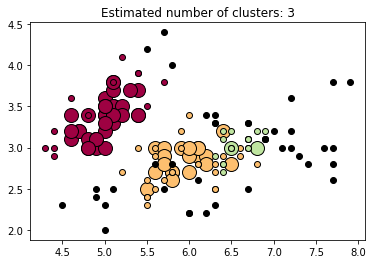

eps = 0.5; min_samples = 13


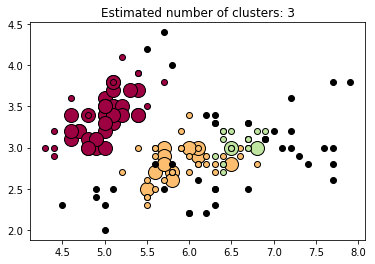

eps = 0.55; min_samples = 17


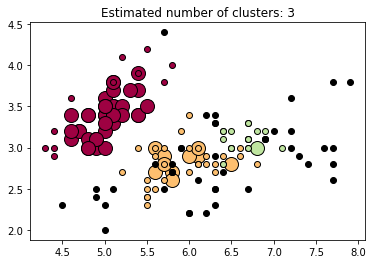

In [6]:
# Compute DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=12)
db = dbscan.fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
# Black removed and is used for noise instead.
def plotDBSCAN():
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = x[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = x[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

print("eps = 0.5; min_samples = 12")
plotDBSCAN()

db = DBSCAN(eps=0.5, min_samples=13).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("eps = 0.5; min_samples = 13")
plotDBSCAN()

db = DBSCAN(eps=0.55, min_samples=17).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("eps = 0.55; min_samples = 17")
plotDBSCAN()

#### 3.1.4 Gaussian Mixture

In [7]:
colors = ['navy', 'turquoise', 'darkorange']
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

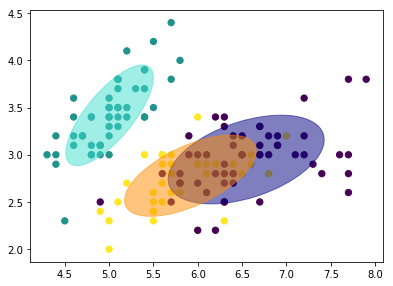

In [8]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x)
labels = gmm.predict(x)

plt.figure(figsize=(5, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
# gmm.covariances_

h = plt.subplot(2, 1 , 1)
make_ellipses(gmm, h)
plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

#### 3.1.5 K-Medoids

[7, 55, 112]


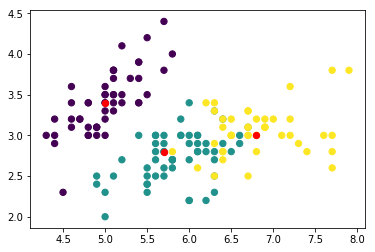

In [9]:
kmedoids_instance = kmedoids(x,[20, 70, 111]);
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(medoids)

# plot cluster
labels = [0 for i in range(0,150)]
for i in range(0, len(clusters)):
    for j in range (0, len(clusters[i])):
        labels[clusters[i][j]] = i
            
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')
for i in range(0, len(medoids)):
    plt.scatter(x[medoids[i], 0], x[medoids[i], 1], c='red', s=40)

plt.show()

#### 3.1.6 Graph Clustering

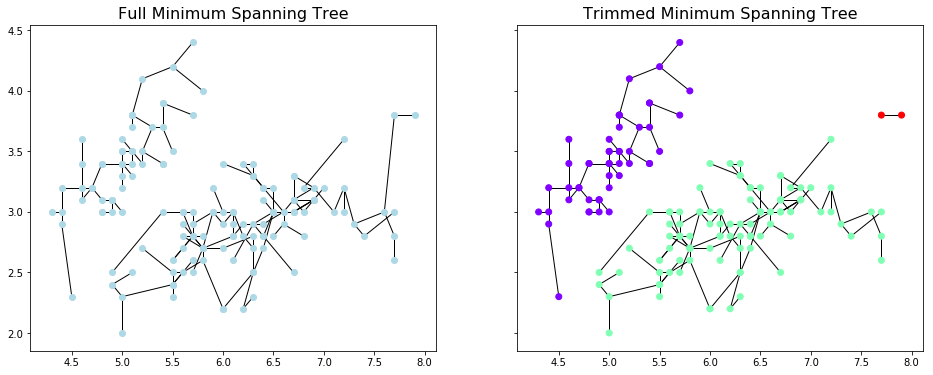

In [10]:
def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);
    
graph_clustering = MSTClustering(cutoff_scale=0.75)
graph_clustering.fit(x)
plot_mst(graph_clustering)
plt.show()

#### 3.1.7 Grid Clustering (BANG Clustering)

In [54]:
# convert numpy array to list
list_dataset = x.tolist()

# clustering using BANG
bang_instance = bang(list_dataset, 14)
bang_instance.process()

clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()
clusters

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [0,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 [117, 131, 109],
 [41]]

#### 3.1.8 Penyimpanan dan Pembacaan Model/Hipotesis pada File Eksternal
**1. Penyimpanan Model/Hipotesis**

In [31]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(agglomerative, 'agglomerative_model.pkl')
joblib.dump(db, 'dbscan_model.pkl')
joblib.dump(gmm, 'gaussian_mixture_model.pkl')
joblib.dump(graph_clustering, 'graph_clustering_model.pkl')

with open('kmedoids_model', "wb") as f:
    dill.dump(kmedoids_instance, f)

with open('bang_model', "wb") as f:
    dill.dump(bang_instance, f)

**2. Pembacaan Model/Hipotesis**

In [33]:
kmeans_model = joblib.load('kmeans_model.pkl')
agglomerative_model = joblib.load('agglomerative_model.pkl')
dbscan_model = joblib.load('dbscan_model.pkl')
gaussian_mixture_model = joblib.load('gaussian_mixture_model.pkl')
graph_clustering_model = joblib.load('graph_clustering_model.pkl')

kmedoids_model = dill.load(open('kmedoids_model', "rb"))
bang_model = dill.load(open('bang_model', "rb"))

#### 3.1.8 Assignment Cluster Instance Baru dengan Model dari File Eksternal
**1. Pembuatan Instance Baru**

In [56]:
test_instance = [[4.8,  3.1 ,  1.1,  0.4]]

new_dataset = np.append(x, test_instance, axis=0)
new_dataset[150]

array([ 4.8,  3.1,  1.1,  0.4])

**2. Assignment Cluster Instance Baru**  
**a. K-Means**

In [22]:
kmeans_cluster_prediction = kmeans_model.predict(test_instance)

**b. Agglomerative Clustering**

In [37]:
agglomerative_prediction = agglomerative_model.fit_predict(new_dataset)
agglomerative_prediction[150]

1

**c. DBSCAN**

In [38]:
dbscan_prediction = dbscan_model.fit_predict(new_dataset)
dbscan_prediction[150]

0

**d. Gaussian Mixture**

In [25]:
gmm_cluster_prediction = gaussian_mixture_model.predict(test_instance)

**e. Graph Clustering**

In [39]:
graph_clustering_prediction = graph_clustering_model.fit_predict(new_dataset)
graph_clustering_prediction[150]

1

**f. K-Medoids**

In [ ]:
# kmedoids

**g. Grid Clustering (BANG)**

In [ ]:
# bang

### 3.2 Clustering Dataset Play Tennis

#### 3.2.1 K-Means

#### 3.2.2 Agglomerative Clustering

#### 3.2.3 DBSCAN

#### 3.2.4 Gaussian Mixture

#### 3.2.5 K-Medoids

#### 3.2.6 Graph Clustering

#### 3.2.7 Grid Clustering (BANG Clustering)